In [1]:
#loading the data using pandas 
import pandas as pd 
df=pd.read_csv('B:\mushroom.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\balav\AppData\Local\Temp\ipykernel_6948\222045789.py:3: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv('B:\mushroom.csv')


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [2]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

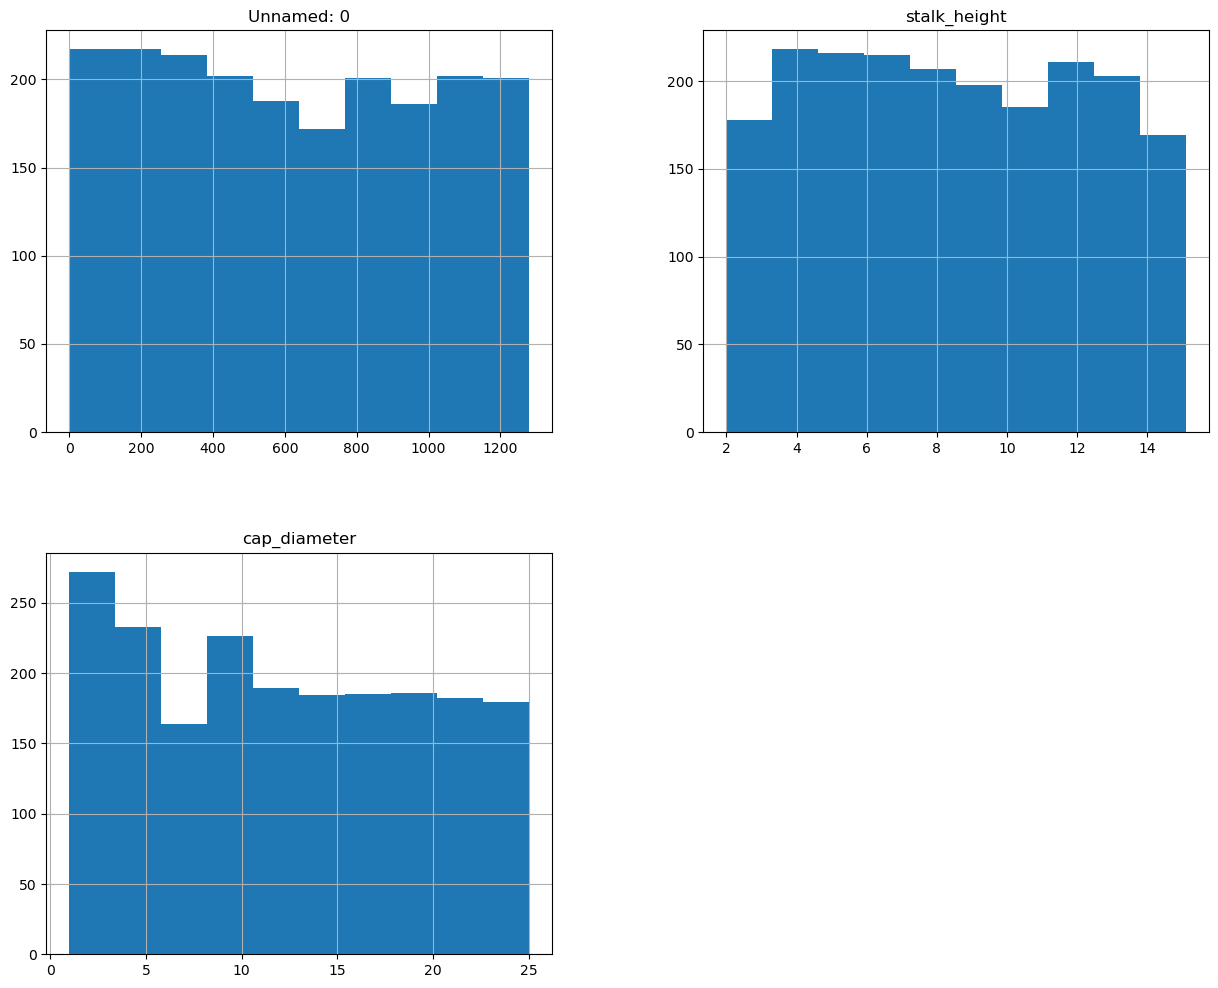

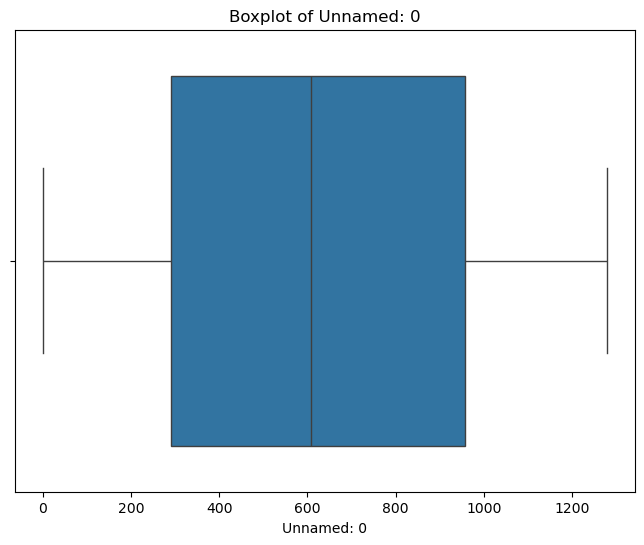

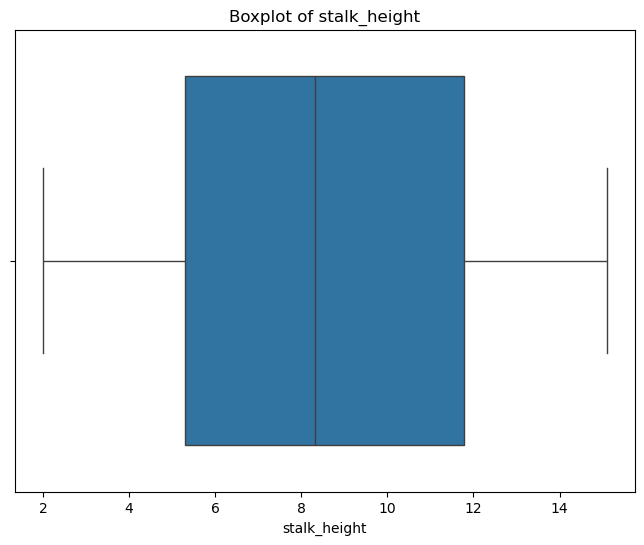

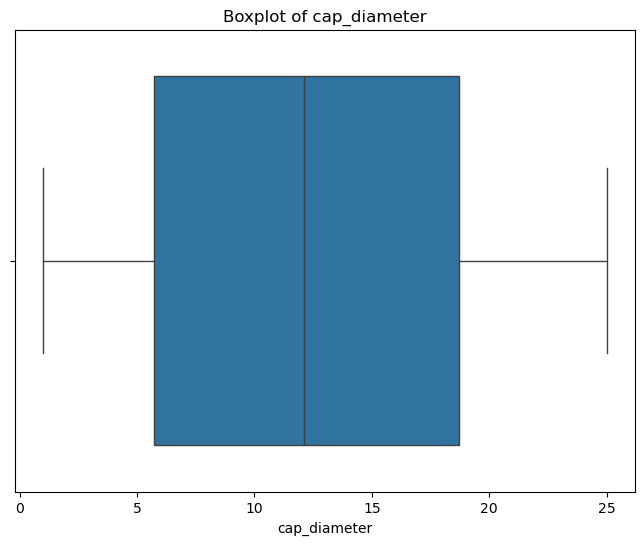

In [4]:
#Data Visualization 
#Histogram for numerical features 

import matplotlib.pyplot as plt 
import seaborn as sns
df.hist(figsize=(15,12))
plt.show()

# Boxplots for numerical features to identify outliers
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


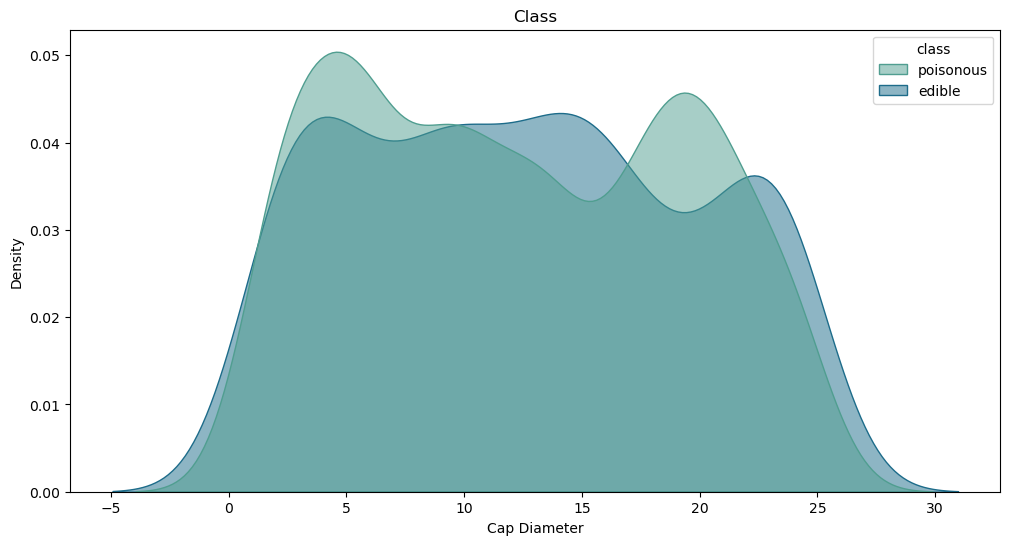

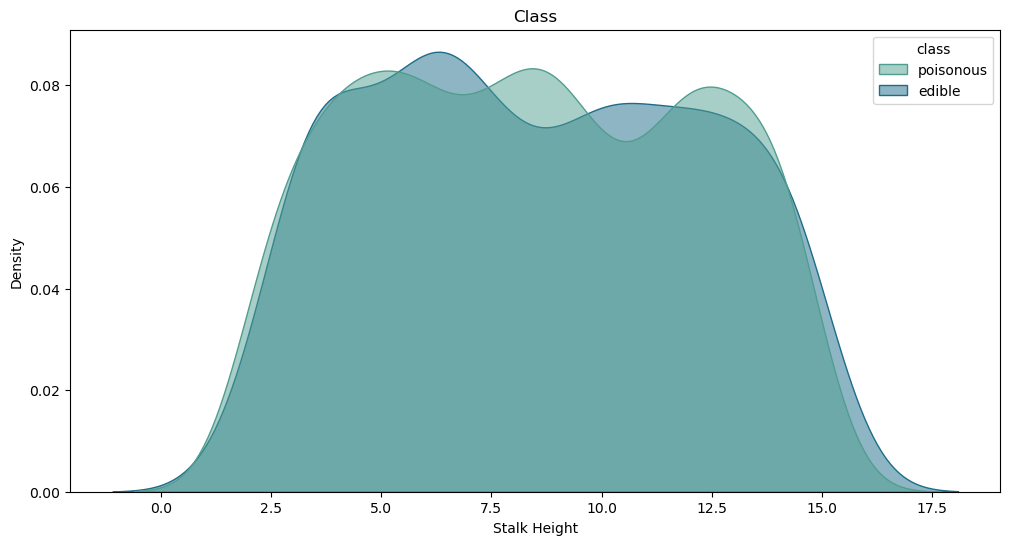

In [5]:
# Creating density plots for selected features in the mushroom dataset
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='cap_diameter', hue='class', fill=True, common_norm=False ,palette='crest', alpha=0.5)
plt.title('Density Plot of Cap Diameter by Class')
plt.xlabel('Cap Diameter')
plt.ylabel('Density')
plt.title('Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='stalk_height', hue='class', fill=True, common_norm=False, palette='crest', alpha=0.5)
plt.title('Density Plot of Stalk Height by Class')
plt.xlabel('Stalk Height')
plt.ylabel('Density')
plt.title('Class')
plt.show()

In [6]:
# Encoding categorical variables to numerical format  
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.columns:
    df[column]=LE.fit_transform(df[column])
    
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [7]:
# Standardizing the features in the mushroom_df dataset
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the feature columns for standardization
features = df.drop('class', axis=1)

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the standardized features
print(features_scaled_df.head())


   Unnamed: 0  cap_shape  cap_surface  cap_color   bruises      odor  \
0    1.435803   1.356643     0.398424   1.194966 -1.023271 -1.175776   
1    1.073256   1.356643    -1.396280   0.814161 -1.023271 -1.175776   
2   -0.827477   0.660035    -0.498928   0.433356  0.977259  0.004524   
3   -0.915474  -1.429786     0.398424   0.052551  0.977259 -0.388909   
4    0.524155   0.660035     1.295777   1.575772  0.977259  0.397958   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0        -0.498601      1.213339  -1.007025    0.487617  ...   
1         1.277359     -0.007938   0.993024   -0.693054  ...   
2        -0.498601     -0.007938  -1.007025    0.782785  ...   
3         1.277359     -1.229216  -1.007025    0.192449  ...   
4         0.389379     -0.007938   0.993024    0.192449  ...   

   stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                1.503079  -1.010051   -1.302350     1.246952   1.062902   
1               -1.572275   0.

In [8]:
# spliting the Data and fixing the X and Y variables 

X=df.drop('class',axis=1)
Y=df['class']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


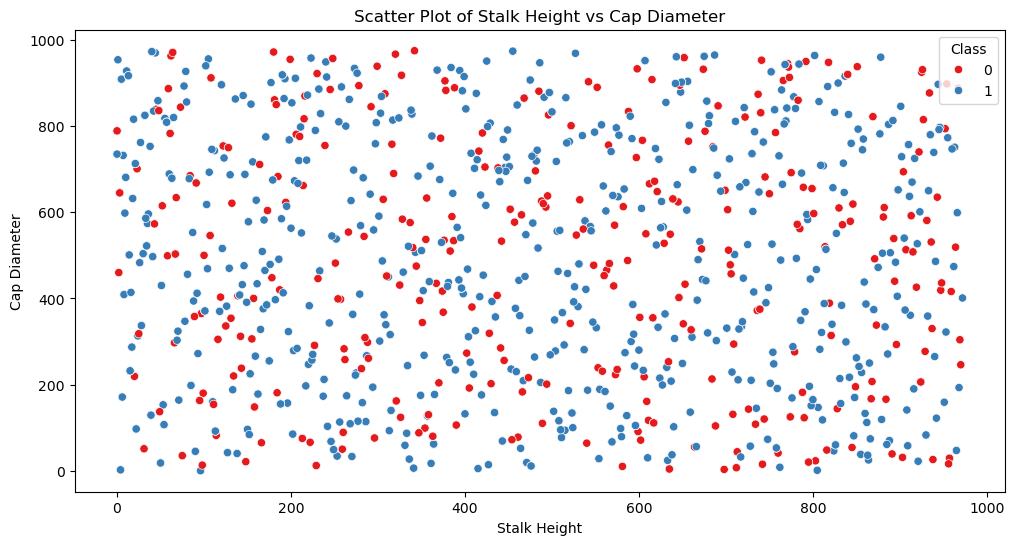

C:\Users\balav\AppData\Local\Temp\ipykernel_6948\1153947863.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='Set2')


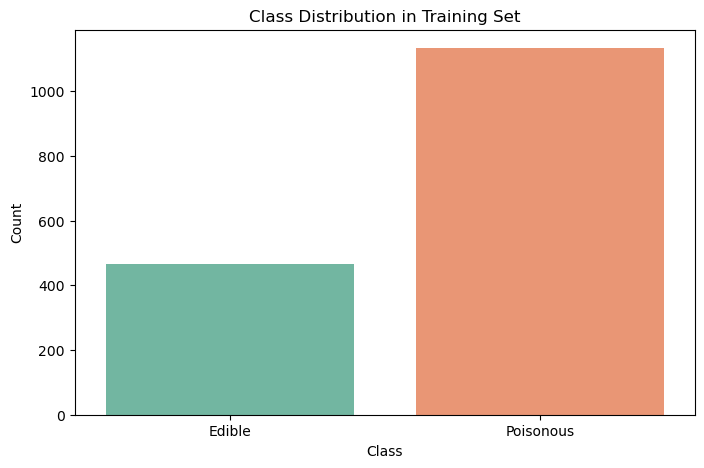

In [9]:
# Data Visualization
# Step 1: Employ scatter plots to comprehend feature distributions and relationships.
# Selecting a few features for scatter plot visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train['stalk_height'], y=X_train['cap_diameter'], hue=Y_train, palette='Set1')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.legend(title='Class')
plt.show()

# Step 2: Visualize class distributions to gauge dataset balance or imbalance.
plt.figure(figsize=(8, 5))
sns.countplot(x=Y_train, palette='Set2')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.show()



In [10]:
from sklearn.svm import SVC

# create a support vector classifier object 
svc_classifier=SVC(kernel='linear',C=1.0)

# fit the classifier to the training data 
svc_classifier.fit(X_train,Y_train)

# predict the labels for the training data
y_pred_train_svc=svc_classifier.predict(X_train)

# calculate the accuracy for the training data 
train_accuracy_svc=svc_classifier.score(X_train,Y_train)

# print the training and test accuracie
print('Training Accuracy (svc):',train_accuracy_svc)

Training Accuracy (svc): 0.708125


In [11]:
# predict the labels for the training data
y_pred_test_svc=svc_classifier.predict(X_test)

# calculate the accuracy for the training data 
test_accuracy_svc=svc_classifier.score(X_test,Y_test)

# print the training and test accuracie
print('Test Accuracy (svc):',test_accuracy_svc)

Test Accuracy (svc): 0.6675


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy for the test data
accuracy = accuracy_score(Y_train, y_pred_train_svc)

# Calculate the precision for the test data
precision = precision_score(Y_train, y_pred_train_svc, average='weighted')

# Calculate the recall for the test data
recall = recall_score(Y_train, y_pred_train_svc, average='weighted')

# Calculate the F1-score for the test data
f1 = f1_score(Y_train, y_pred_train_svc, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.708125
Precision: 0.501441015625
Recall: 0.708125
F1-Score: 0.5871244968898646


B:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


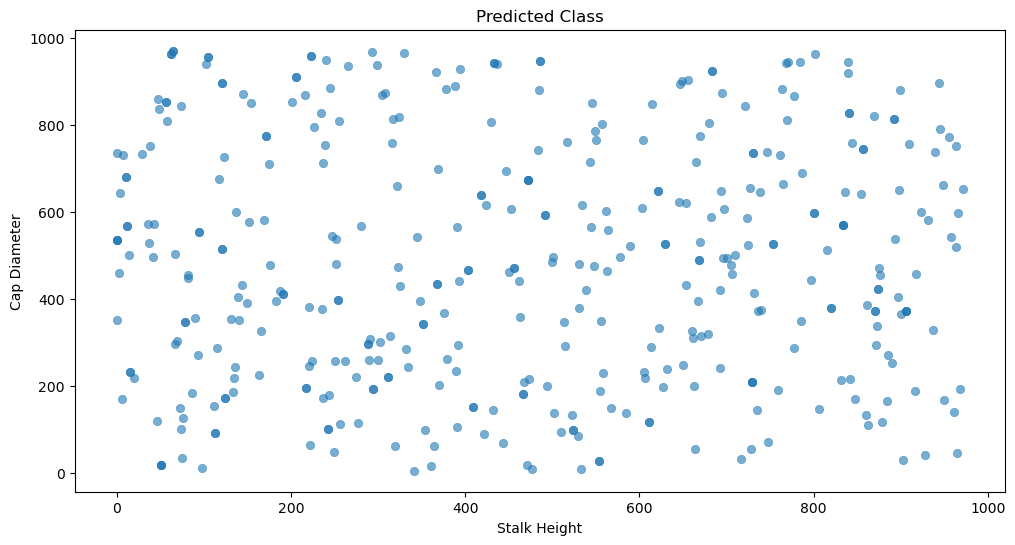

In [13]:
# Visualization of SVM Results
# Visualizing the classification results on the testing data

plt.figure(figsize=(12, 6))
# Plotting decision boundary
sns.scatterplot(x=X_test['stalk_height'], y=X_test['cap_diameter'], alpha=0.6, edgecolor=None)
plt.title('SVM Classification Results on Testing Data')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.title('Predicted Class')
plt.show()

In [17]:
kernels = ['linear', 'poly', 'rbf']

# Initialize a dictionary to store results
results = {}

# Loop over the different kernels and evaluate the performance
for kernel in kernels:
    # Create an SVM classifier with the given kernel
    svc_classifier = SVC(kernel=kernel)
    
    # Train the classifier on the training data
    svc_classifier.fit(X_train, Y_train)  # Ensure both X_train and y_train are used
    
    # Make predictions on the test set
    y_pred_test_svc = svc_classifier.predict(X_test)
    
    # Calculate the accuracy using the correct test labels (y_test)
    accuracy = accuracy_score(Y_test, y_pred_test_svc)
    
    # Store the accuracy in the results dictionary
    results[kernel] = accuracy
    
    # Output the classification report for each kernel
    print(f"Kernel: {kernel}")
    print(Y_test, y_pred_test_svc)  # Use y_pred_test_svc
    print("-" * 50)

# Print a summary of accuracies
print("Comparison of SVM kernel performance:")
for kernel, accuracy in results.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")


Kernel: linear
1860    1
353     1
1333    0
905     1
1289    0
       ..
965     1
1284    1
1739    1
261     1
535     1
Name: class, Length: 400, dtype: int32 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
------------------------